# 비선형(non-linear) 회귀(regression)

- 실제 데이터들은 선형 모형으로 적합하지 않을 가능성이 훨씬 더 높다.
- 비선형의 가장 큰 문제는 정확도가 그리 높지 않다는 것.

## 데이터 만들기

$$
    f(x) = x^2 + 4x + 6
$$

$$
    f(x) = ax^2 + bx + c
$$
- 이 함수를 사용해서 가상의 데이터를 가정해보자

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#함수 정의
def f(x):
    return x ** 2 + 4 * x + 6

In [7]:
x = np.linspace(-20, 60, 50)
y = f(x)

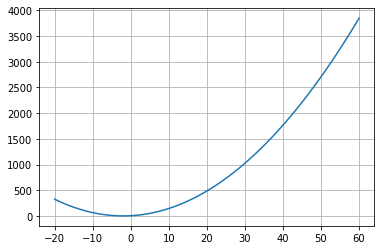

In [8]:
plt.plot(x,y)
plt.grid()
plt.show()

In [9]:
y = y + 500 * np.random.rand(len(x))

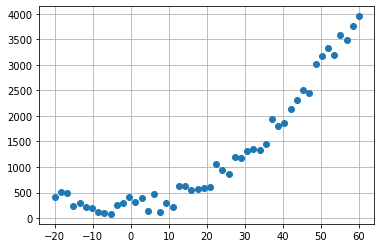

In [10]:
# 임의의 분포표
plt.plot(x,y, 'o')
plt.grid()
plt.show()

## loss function 

- MSE(Mean Squared Error)

$$
    loss(w) = \frac{1}{N} \sum_{i=1}^N | w_0x_i^2 + w_1x_i + w_2 - y_i|^2
$$

In [11]:
from scipy.optimize import minimize

In [12]:
def loss(w):
    return np.mean((w[0] * x ** 2 + w[1] * x + w[2] - y)**2)

In [13]:
w0 = [0,0,0]
ret = minimize(loss, w0)

In [17]:
w = ret.x
print(w)
y_predict = w[0] * x ** 2 + w[1] * x + w[2] # 예측값

[  0.95928892   6.21640325 206.00202628]


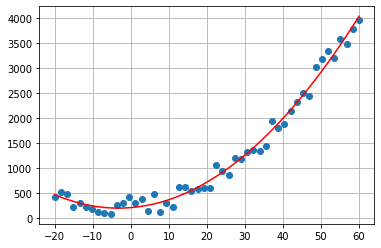

In [18]:
plt.plot(x,y, 'o')
plt.plot(x, y_predict, 'r-')
plt.grid()
plt.show()

## sample 예

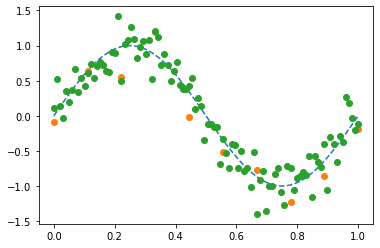

In [24]:
np.random.seed(2)

x = np.linspace(0, 1, 100)
t = np.sin(2*np.pi*x)

N = 10
x_train = np.linspace(0, 1, N)
t_train = np.sin(2*np.pi*x_train) + (np.random.randn(N)/5)

Noise = 100
x_noise = np.linspace(0, 1, Noise)
t_noise = np.sin(2*np.pi*x_noise) + (np.random.randn(Noise)/5)

plt.plot(x,t, '--')
plt.plot(x_train, t_train, 'o')
plt.plot(x_noise, t_noise, 'o')
plt.show()

## 선형 모델의 적용(linear regression)
- 주어진 데이터가 선형적인 관계가 있을것으로 가정(hypothesis)
- 위에 같이 하는 이유: 주어진 데이터의 함수를 찾는게 너무 어려워서..
- 일단 함수를 가정 해놓으면 모수를 찾는 문제로 바꿀 수 있으니까 쉬워진다.

- 준비된 학습 데이터를 잘 표현하는 `직선`을 찾는다면 다음과 같은 함수로 가정하고 시작할 수 있다.
$$
    y = b + ax\\
    y = \theta_0 + \theta_1 x\\
    y = w_0 + w_1x
$$

- 1이 생략된 형태이므로 다음과 같이 표현이 가능
$$
    y = w_0 \cdot + w_1\cdot x
$$

- 그래서 벡터 표현으로 바꾼다면 다음과 같을 것이다.

$$ 
    y = w_0 \cdot 1 + w_1 \cdot x [w_0, w_1] \cdot \begin{bmatrix} 1 \\ x \end{bmatrix} = w^T \cdot x
$$

## 문제점
- 관찰된(수집된) 데이터가 부족 # 가장 큰 문제
- 결과적으로는 sin()함수와 같은 모델을 만드는게 목적이긴 하겠지만
- 선형적으로 비선형 적으로 가능한지 모르는 상황

In [25]:
def loss(w):
    return np.mean((w[0] + w[1] * x - t)**2)

In [26]:
w0 = [0, 0]
ret = minimize(loss, w0)

In [27]:
w = ret.x
print(w)
y_predict = w[0] + w[1] * x # 예측값

[ 0.92634932 -1.85269857]


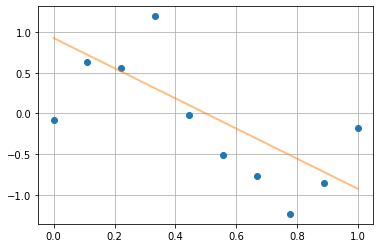

In [33]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, w[0]+w[1]*x, alpha=0.5, lw=2)
plt.grid()
plt.show()

## 비선형 회귀(non-linear) 회귀(regression)

- 위에서처럼 직선으로는 주어진 데이터를 잘 설명하지 못하는 경우가 있다.
- 그래서 곡선형 회귀도 필요하다
- 다항식을 사용할 수 있는데, 이 다항식이 sin() 처럼 비슷해지기를 바라는 상황

- 우리가 만들 수 있는 다항식은 다음과 같다.
$$
    y(x, w) = w_0 + w_1x^1 + w_2x^3 + \cdots + w_nx^n
$$

- 어떤 형태의 다항함수를 쓸 것인가?
- 항을 몇개를 쓸거고, 치수는 얼마로 선택할 것인가? ...

$$
    y(x, w) = -2 + 1.5x + 0.3x^2 + 3x^3
$$

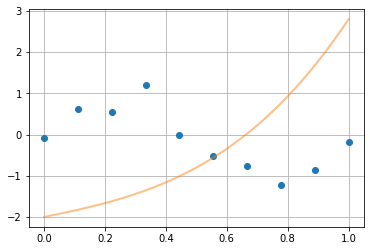

In [34]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, -2 + 1.5 * x + 0.3 * x ** 2 + 3 *x ** 3, alpha=0.5, lw=2)
plt.grid()
plt.show()

## numpy의 라이브러리를 이용하여 문제 풀기

In [38]:
# 1차 다항식
tmp1 = np.polyfit(x_train, t_train, 1)
tmp2 = np.polyfit(x_train, t_train, 9)

lin = np.poly1d(tmp1)
non_lin = np.poly1d(tmp2)

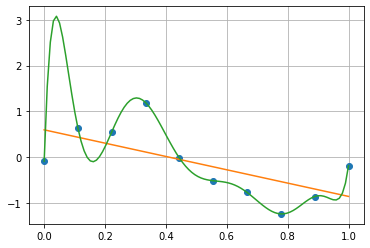

In [39]:
plt.plot(x_train, t_train, 'o')
plt.plot(x, lin(x)) # 직선인 경우
plt. plot(x, non_lin(x))
plt.grid()
plt.show()

## 수학적으로 데이터의 갯수가 n일 때, n-1차식을 이용하여 주어진 데이터를 정확히 표현할 수 있는 함수의 존재는 증명이 되었다.

# 아이스크림 문제풀이 (비선형 회귀 적용)

In [42]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [43]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

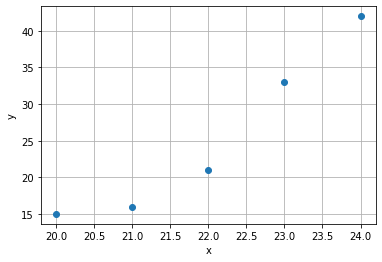

In [44]:
plt.plot(x,y, 'o')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [45]:
def loss(w):
    return np.mean((w[0] + w[1] * x + w[2] * x **2 + w[3] * x ** 3 - y)**2)

In [46]:
w0 = [0, 0, 0, 0]
ret = minimize(loss, w0)

In [47]:
w = ret.x
print(w)
y_predict = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3 # 예측값

[ 9.14112600e+03 -1.22432172e+03  5.43325720e+01 -7.96500562e-01]


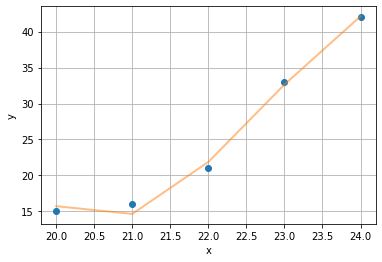

In [48]:
plt.plot(x,y, 'o')
plt.plot(x, y_predict, alpha=0.5, lw=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
# 1차 다항식
coef1 = np.polyfit(x, y, 1)
lin = np.poly1d(coef1)

In [50]:
lin.coefficients

array([   7.1, -130.8])

In [51]:
# n차 다항식
coef2 = np.polyfit(x, y, 4)
non_lin = np.poly1d(coef2)

In [52]:
non_lin.coefficients

array([-5.41666667e-01,  4.70833333e+01, -1.53045833e+03,  2.20549167e+04,
       -1.18900000e+05])

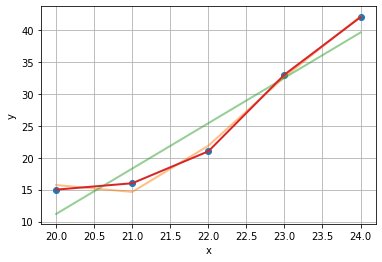

In [53]:
plt.plot(x, y, 'o')
plt.plot(x, y_predict, alpha=0.5, lw=2)
plt.plot(x, lin(x), alpha = 0.5, lw=2)
plt.plot(x, non_lin(x), alpha=1,lw=2)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()